# Data Driven Modeling
### (Theme of this semester: CODING AS LITERACY)
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 15th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;">11 April 2017</span>


# Introduction to Representation Learning: Convolutional Neural Networks

### To be discussed
* ** Review of Fourier and its limits**
* **Feature Enginering and Feature (Representation) Learning**
* **Convolution**
* **Convolutional Neural Networks**
* ** Examples in Urban Studies**
* **Extensions and applications**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys
import sompylib.sompy as SOM# from pandas import Series, DataFrame

from ipywidgets import interact, HTML, FloatSlider

%matplotlib inline


# Signal Processing is a main part of Data Driven Modeling cases
* **Usually observations are homogeneous**
    * **Pixels of image**
    * **Sequence of values in sound signal or any other time series**
    * **A Graphical representation of an artifact: City, building,...**
* ** Usually, we are looking for something on top of the observations (Categories)**
    * **Message of the sentence** 
    * **A certain pattern in an image such as a face in the picture** 
* ** All the methods are developed in a way to capture "invariances" within categories of interest**
    * **translation invariance**
    * **rotation invariance**
    * **scale invariance** 
    * **Deformation**
* **Hierarchical Representation and Compositionality**
    * Text
    * Video
    * A Building
    * Cities

<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# Fourier Series as Idealized Basis Functions 

## The Fourier series is linear algebra in infinite dimensions, where vectors are functions


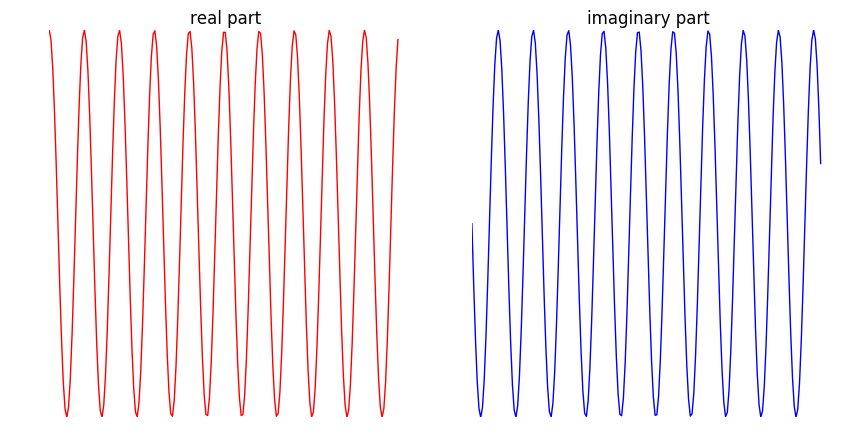

In [2]:
#Base Filters 1D
def base_filter_1D(N):
    dd = -2*np.pi/N
    w = np.exp(dd*1j)
#     w = np.exp(-2*np.pi*1j/N)
    
    W = np.ones((N,N),dtype=complex)
    
    for i in range(N):
        for j in range(N):
            W[i,j] = np.power(w,i*j)

#     W = W/np.sqrt(N)
    return W

def DFT_1D_basis_vis(i):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    #Real Part of the vector
    plt.plot(np.real(W)[i],'r')
    #Imaginary Part of the vector
    plt.title('real part')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('imaginary part')
    plt.plot(np.imag(W)[i],'b')
    plt.axis('off')
N = 256
W = base_filter_1D(N)
interact(DFT_1D_basis_vis,i=(0,N-1,1));

## Now from Time domain to Frequency domain

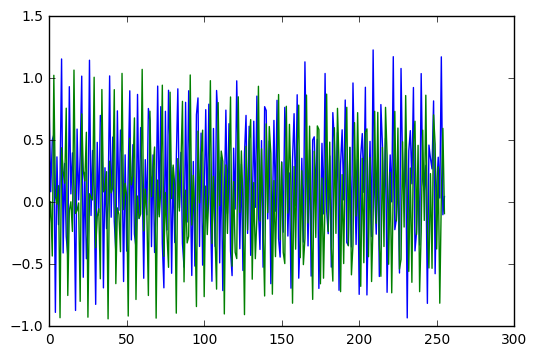

In [3]:
# Two signals have the same frequencies but with a shift in time
N = 256
t = np.arange(N)
x1 = .4*np.sin(1*t+.1) + .6*np.cos(-15*t+.1) + .3*np.random.rand(N)
x2 = .4*np.sin(1*(t-2)+.1) + .6*np.cos(-15*(t-16)+.1) + .1*np.random.rand(N)
plt.plot(x1)
plt.plot(x2)

In [4]:
W = base_filter_1D(N)
X1 = W.dot(x1)
X2 = W.dot(x2)

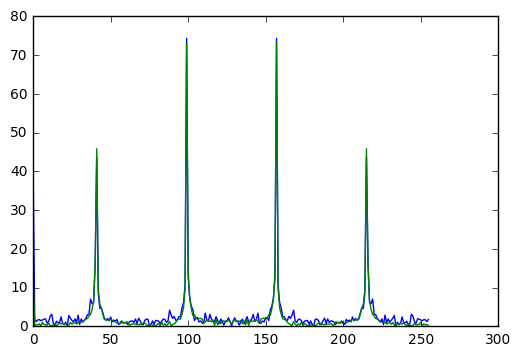

In [5]:
plt.plot(np.abs(np.absolute(X1)),'b');
plt.plot(np.abs(np.absolute(X2)),'g');

# 2D Fourier 
http://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf


In [6]:
N = 16
W1D = base_filter_1D(N)
def base_filter2d_vis(u=1,v=1):
    
    r = W1D[u][np.newaxis,:].T
    c = W1D[v][np.newaxis,:]
    W2 = r.dot(c)
    fig = plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('Real Part(CoSine Wave)')
    plt.imshow(np.real(W2),cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('Imaginary Part (Sine Wave)')
    plt.axis('off')
    plt.imshow(np.imag(W2),cmap=plt.cm.gray)

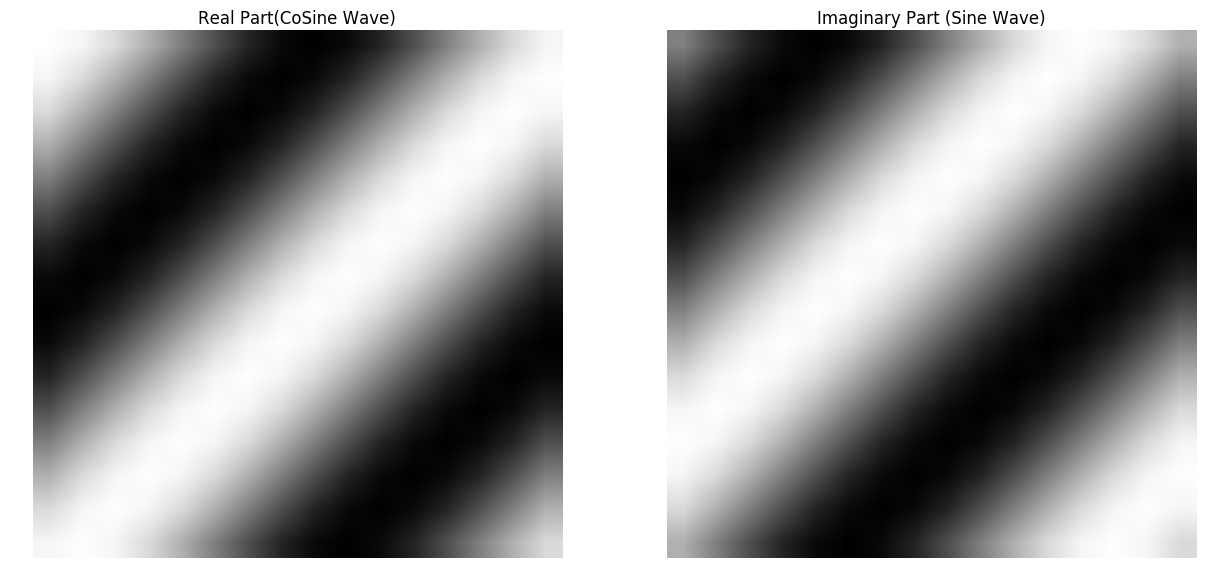

In [7]:
interact(base_filter2d_vis,u=(0,N-1,1),v=(0,N-1,1));

In [8]:
#Base Filters 2D
def base_filter_2D(N):
    W1D = base_filter_1D(N)*np.sqrt(N)
    W2D = np.ones((N,N,N,N),dtype=complex)
    
    for u in range(0,N):
        for v in range(0,N):
            r = W1D[u][np.newaxis,:].T
            c = W1D[v][np.newaxis,:]
            W2D[u,v,:,:] = r.dot(c)
    W2D = W2D/(np.sqrt(N*N))
    return W2D

## Base Filters Dictionary
* Note that these base filters are defined independent of the data!

(8, 8, 8, 8)


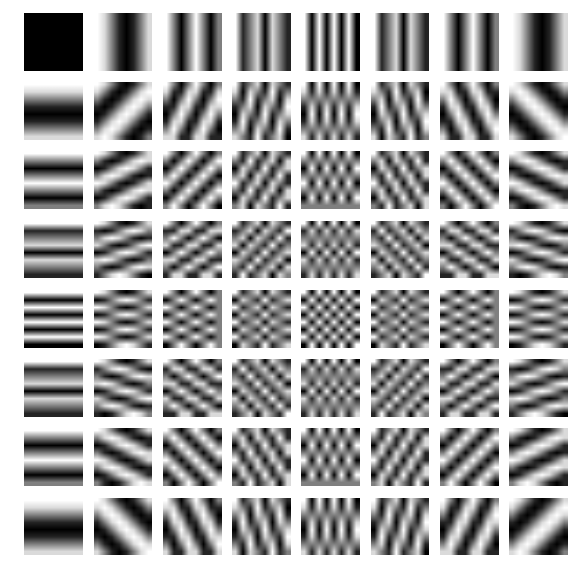

In [9]:
N = 8
W2D = base_filter_2D(N)
print W2D.shape
fig = plt.figure(figsize=(7,7))
k =1 
for u in range(0,N):
    for v in range(0,N):
        W2 = W2D[u,v,:,:]
        plt.subplot(N,N,k)
        plt.imshow(np.real(W2),cmap=plt.cm.gray)
#         plt.imshow(np.imag(W2),cmap=plt.cm.gray)
        k = k +1
        plt.axis('off')


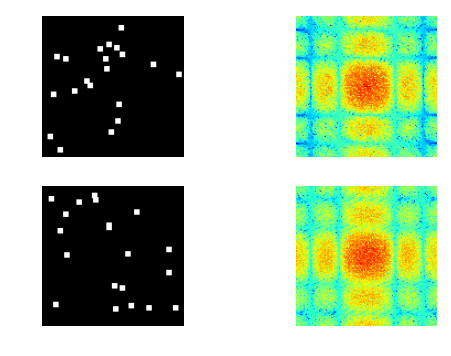

In [10]:
# Example 1
# With shift stil the patters are similar in freq domain
N = 128
x = 5
y = 5
img = np.zeros((128,128))

for i in range(20):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1
plt.subplot(2,2,1);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');

plt.subplot(2,2,2);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');


img = np.zeros((128,128))

for i in range(20):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1
plt.subplot(2,2,3);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');


plt.subplot(2,2,4);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');

# Conclusion of Fourier

# No learning
# Hard to learn hierarchies, scale, ...

# And essentially not Data Driven

# Conceptually, Fouries Transform is at the same level as Polynomial regression, where there is a parametric structure imposed to data set. 




<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# So a fundamental quesion has been always that wheter one can let the models learn the filters? 
## Until recently there were no alternative than desiging the filters, which means less capacity for the model
<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# Representation Learning

## Considering these factors?
* **translation invariance**
* **rotation invariance**
* **scale invariance** 
* **Deformation**

* **Compositionality and Hierarchical Representation**
## Convolutional Neural Networks (CNN) are seemingly a very good answer



![](Images/CNN_Face1.png)
    

# Convolution

## Continous case
![](Images/Convolution_cont.svg)

## Discrete case
![](Images/Convolution_Disc1.svg)

### 1D Convolution

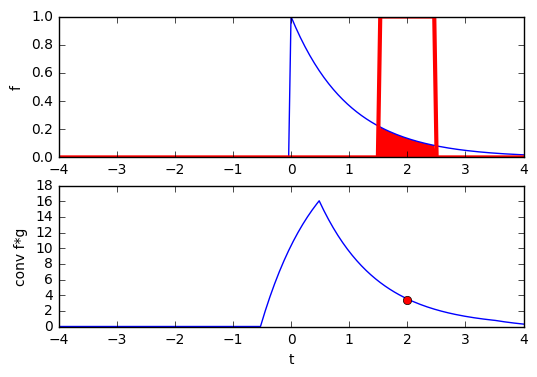

In [11]:
N = 100
t = np.linspace(0,4,num=N)
t =np.unique(np.concatenate((t,-t)))
r = t[-1]-t[0]
N = t.shape[0]
f = 1*np.sin(2.5*t) + 1*np.cos(1.5*t+.1)  + .63*np.random.rand(N)
f[f<0]=0
f = np.exp(-t)
f[t<0]=0

# f = np.ones(t.shape)*1
# c = 0
# f[t>=(c+1)]=0
# f[t<=(c-1)]=0


# sigma = 2
# f = np.exp(-(t-c)**2/2*sigma)


def vis_con(k=2):

    plt.subplot(2,1,1)
    plt.plot(t, f,'-b');
    
#     c = 0
    fgs = []
    sigma = 1
    
    for c in t:
        g = np.ones(t.shape)*1
        g[t>=(c+.5)]=0
        g[t<=(c-.5)]=0
        
#         g = np.exp(-((t-c)**2)/(2*(sigma**2)))
#         g = g/(np.sqrt(2*np.pi)*sigma)
        fgs.append(np.dot(f,g))
    
    
    
    
    g = np.ones(t.shape)*1
    g[t>=(k+.5)]=0
    g[t<=(k-.5)]=0
    
    
    #Guassian
#     g = np.exp(-((t-k)**2)/(2*(sigma**2)))
#     g = g/(np.sqrt(2*np.pi)*sigma)
#     g = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((t-k)**2)/(2*sigma**2))
    
    fg = np.dot(f,g)
    plt.plot(t,g,'-r',linewidth=3)
    plt.ylabel('f')

    bottom1 = np.minimum(g, 0)
    bottom2 = np.minimum(0,f)
    bottom= np.minimum(bottom1,bottom2)
    top = np.minimum(g,f)
    plt.fill_between(t,top, bottom,facecolor='red',edgecolor="None", interpolate=True);
    plt.subplot(2,1,2);
    plt.plot(t,fgs)
#     plt.plot(t,np.convolve(f,g,mode='same'),'g');
    plt.plot(k,fg,'or');
    plt.xlim(t[0],t[-1])
    plt.ylabel('conv f*g')
    plt.xlabel('t')
interact(vis_con,k=(-4,4,.1));

## It can be a signal smoothing way
## Guassian Kernel

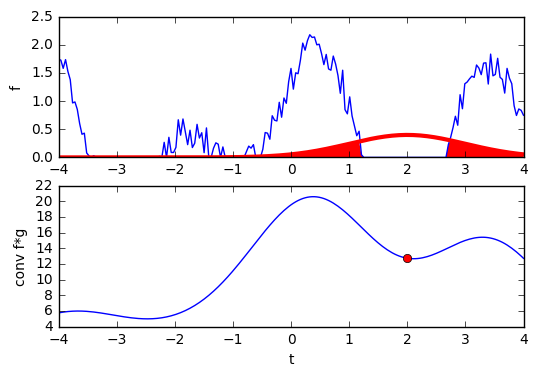

In [12]:
N = 100
t = np.linspace(0,4,num=N)
t =np.unique(np.concatenate((t,-t)))
r = t[-1]-t[0]
N = t.shape[0]
f = 1*np.sin(2.5*t) + 1*np.cos(1.5*t+.1)  + .63*np.random.rand(N)
f[f<0]=0
# f = np.exp(-t)
# f[t<0]=0

# f = np.ones(t.shape)*1
# c = 0
# f[t>=(c+1)]=0
# f[t<=(c-1)]=0


# sigma = 2
# f = np.exp(-(t-c)**2/2*sigma)


def vis_con(k=2,sigma=1):

    plt.subplot(2,1,1)
    plt.plot(t, f,'-b');
    
#     c = 0
    fgs = []
#     sigma = 1
    
    for c in t:
        g = np.ones(t.shape)*1
        g[t>=(c+.5)]=0
        g[t<=(c-.5)]=0
        
        g = np.exp(-((t-c)**2)/(2*(sigma**2)))
        g = g/(np.sqrt(2*np.pi)*sigma)
        fgs.append(np.dot(f,g))
    
    
    
    g = np.ones(t.shape)*1
    g[t>=(k+.5)]=0
    g[t<=(k-.5)]=0
    
    
    #Guassian
    g = np.exp(-((t-k)**2)/(2*(sigma**2)))
    g = g/(np.sqrt(2*np.pi)*sigma)
#     g = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((t-k)**2)/(2*sigma**2))
    
    fg = np.dot(f,g)
    plt.plot(t,g,'-r',linewidth=3)
    plt.ylabel('f')

    bottom1 = np.minimum(np.abs(g), 0)
    bottom2 = np.minimum(0,np.abs(f))
    bottom= np.minimum(bottom1,bottom2)
    top = np.minimum(np.abs(g),np.abs(f))
    plt.fill_between(t,top, bottom,facecolor='red',edgecolor="None", interpolate=True);
    plt.subplot(2,1,2);
    plt.plot(t,fgs)
#     plt.plot(t,np.convolve(f,g,mode='same'),'g');
    plt.plot(k,fg,'or');
    plt.xlim(t[0],t[-1])
    plt.ylabel('conv f*g')
    plt.xlabel('t')
interact(vis_con,k=(-4,4,.1),sigma=(.01,2,.1));

## What if the kernel is periodic or bigger than the domain of the data (f)?
## It will be simply an average over f

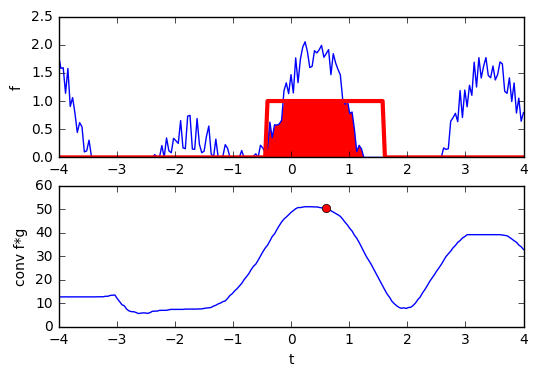

In [16]:

N = 100
t = np.linspace(0,4,num=N)
t =np.unique(np.concatenate((t,-t)))
r = t[-1]-t[0]
N = t.shape[0]
f = 1*np.sin(2.5*t) + 1*np.cos(1.5*t+.1)  + .63*np.random.rand(N)
# f[f<0]=0
# f = np.exp(-t)
# f[t<0]=0

# f = np.ones(t.shape)*1
# c = 0
# f[t>=(c+1)]=0
# f[t<=(c-1)]=0


sigma = 2
# f = np.exp(-(t-c)**2/2*sigma)


def vis_con(k=2,sigma=1):

    plt.subplot(2,1,1)
    plt.plot(t, f,'-b');
    
#     c = 0
    fgs = []
#     sigma = 1
    
    for c in t:
        g = np.ones(t.shape)*1
        g[t>=(c+sigma)]=0
        g[t<=(c-sigma)]=0
        
#         g = np.exp(-((t-c)**2)/(2*(sigma**2)))
#         g = g/(np.sqrt(2*np.pi)*sigma)
        fgs.append(np.dot(f,g))
    
    
    
    g = np.ones(t.shape)*1
    g[t>=(k+sigma)]=0
    g[t<=(k-sigma)]=0
    
    
    #Guassian
#     g = np.exp(-((t-k)**2)/(2*(sigma**2)))
#     g = g/(np.sqrt(2*np.pi)*sigma)
#     g = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((t-k)**2)/(2*sigma**2))
    
    fg = np.dot(f,g)
    plt.plot(t,g,'-r',linewidth=3)
    plt.ylabel('f')

    bottom1 = np.minimum(np.abs(g), 0)
    bottom2 = np.minimum(0,np.abs(f))
    bottom= np.minimum(bottom1,bottom2)
    top = np.minimum(np.abs(g),np.abs(f))
    plt.fill_between(t,top, bottom,facecolor='red',edgecolor="None", interpolate=True);
    plt.subplot(2,1,2);
    plt.plot(t,fgs)
#     plt.plot(t,np.convolve(f,g,mode='same'),'g');
    plt.plot(k,fg,'or');
    plt.xlim(t[0],t[-1])
    plt.ylabel('conv f*g')
    plt.xlabel('t')
interact(vis_con,k=(-4,4,.1),sigma=(.01,10,.1));

# Fourier Transform and Convolution
### We can think of DFT in Fourier analysis as convolution with Global Kernels (kernel and input have the same size)
### Therefore, convolution of each base is invariant and it is just one value for each base filter 

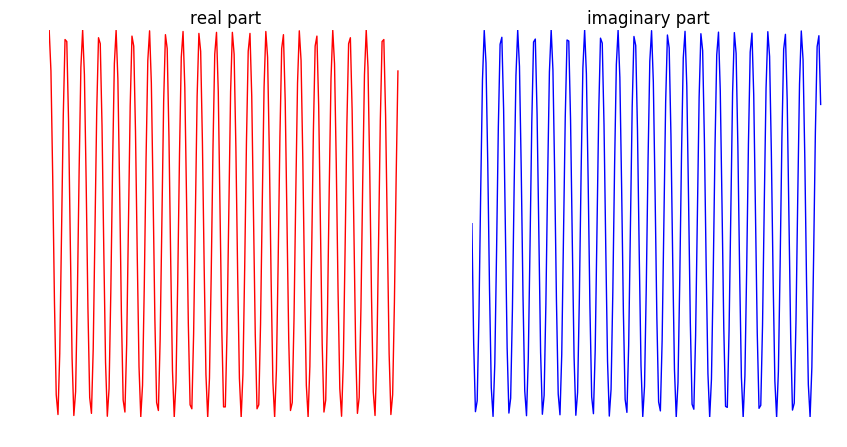

In [14]:
interact(DFT_1D_basis_vis,i=(0,N-1,1));

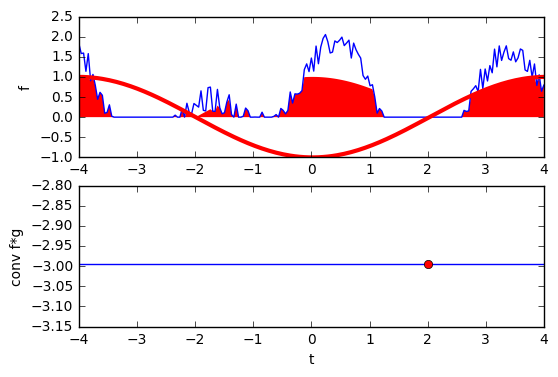

In [18]:
N = 100
t = np.linspace(0,4,num=N)
t =np.unique(np.concatenate((t,-t)))
r = t[-1]-t[0]
N = t.shape[0]
f = 1*np.sin(2.5*t) + 1*np.cos(1.5*t+.1)  + .63*np.random.rand(N)
f[f<0]=0
# f = np.exp(-t)
# f[t<0]=0

# f = np.ones(t.shape)*1
# c = 0
# f[t>=(c+1)]=0
# f[t<=(c-1)]=0


# sigma = 2
# f = np.exp(-(t-c)**2/2*sigma)


def vis_con_f(base_filter=1,k=2):
    
    n = base_filter
    plt.subplot(2,1,1)
    plt.plot(t, f,'-b');
    
#     c = 0
    fgs = []
#     sigma = 1
    
    for c in t:
        g = np.real(W[n])
        fgs.append(np.dot(f,g))
    
    
    g = np.real(W[n])
    
    
    #Guassian
#     g = np.exp(-((t-k)**2)/(2*(sigma**2)))
#     g = g/(np.sqrt(2*np.pi)*sigma)
#     g = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((t-k)**2)/(2*sigma**2))
    
    fg = np.dot(f,g)
    plt.plot(t,g,'-r',linewidth=3)
    plt.ylabel('f')

    bottom1 = np.minimum(np.abs(g), 0)
    bottom2 = np.minimum(0,np.abs(f))
    bottom= np.minimum(bottom1,bottom2)
    top = np.minimum(np.abs(g),np.abs(f))
    plt.fill_between(t,top, bottom,facecolor='red',edgecolor="None", interpolate=True);
    plt.subplot(2,1,2);
    plt.plot(t,fgs)
#     plt.plot(t,np.convolve(f,g,mode='same'),'g');
    plt.plot(k,fg,'or');
    plt.xlim(t[0],t[-1])
    plt.ylabel('conv f*g')
    plt.xlabel('t')

N = t.shape[0]
W = base_filter_1D(N)
interact(vis_con_f,base_filter=(0,W.shape[0],1),k=(-4,4,.1));


## 2D Convolution

![](Images/full_padding_no_strides.gif)
More combinations: https://github.com/vdumoulin/conv_arithmetic

### Arbitrary Convolutional Kernels 

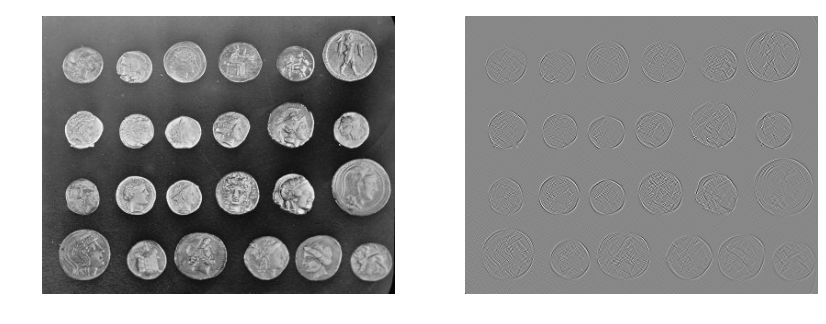

In [19]:
#2D
from skimage import data
from skimage import data, io, filters
from skimage.color import rgb2gray
import scipy.signal as sg

fig = plt.figure(figsize=(10,5));
image = data.coins()
plt.subplot(1,2,1);
plt.imshow(image,plt.cm.gray);


#Bluring Kernel
kernel = [[0,1,0],[1,-4,1],[0,1,0]]

#Edge
kernel = [[1,-1],[-1,1]]
plt.axis('off');
fm = sg.convolve2d(image,kernel)
plt.subplot(1,2,2);
plt.imshow(fm,plt.cm.gray);
plt.axis('off');


<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />
## Convolutional Neural Networks (idea from 1980s, popular from ~2010)
<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />

### Main Elements:
* **Learn several locally stationary Kernels via backprogation**
* **Create a hierarchy of stacked kernels (Deep Networks)**
* ** Nonlinearization of convolutions**
* **Subsampling and Pooling for hierarchical features **
* ** Learn linear classifier on top of high dimensional linearized (between categories) space**


- [A review paper by Stéphane Mallat](http://rsta.royalsocietypublishing.org/content/roypta/374/2065/20150203.full.pdf)




## A typical Archictecture of CNN

![](Images/convnet_arch.png)

## Nonlinearization of the Convolution output

In [20]:
# Adding nonlinearities and normalizing the results 

def ReLu(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1/(1+np.exp(-.03*x))

def tanh(x):
    return sigmoid(2*x) - sigmoid(-2*x)

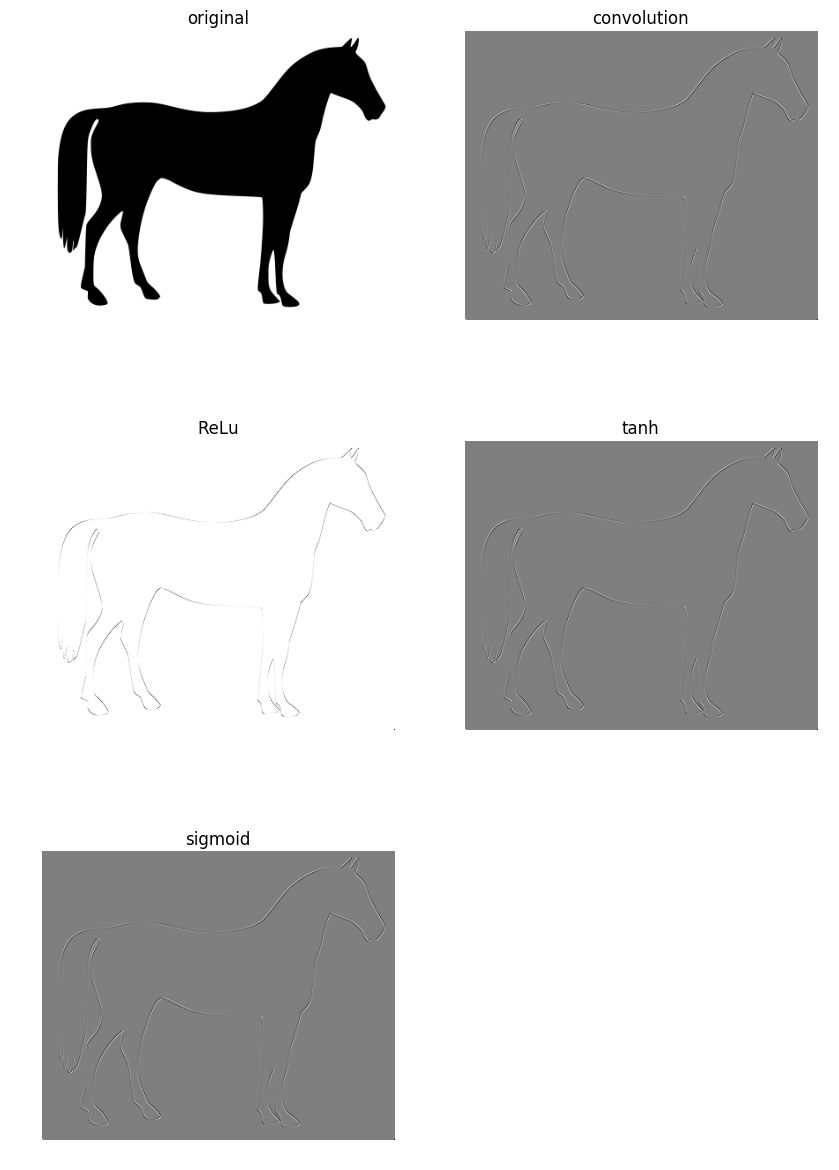

In [21]:
fig = plt.figure(figsize=(10,15));
image = data.coins()
image = data.coffee()
image = data.astronaut()
image = data.horse()
image = rgb2gray(image)

plt.subplot(3,2,1);
plt.imshow(image,plt.cm.gray);
plt.title('original')
plt.axis('off');


#Edge
kernel = [[1,-1],[-1,1]]


fm = sg.convolve2d(image,kernel)
plt.subplot(3,2,2);
plt.imshow(fm,plt.cm.gray_r);
plt.title('convolution')
plt.axis('off');

plt.subplot(3,2,3);
plt.imshow(ReLu(fm),plt.cm.gray_r);
plt.title('ReLu')
plt.axis('off');


plt.subplot(3,2,4);
plt.imshow(tanh(fm),plt.cm.gray_r);
plt.title('tanh')
plt.axis('off');

plt.subplot(3,2,5);
plt.imshow(sigmoid(fm),plt.cm.gray_r);
plt.title('sigmoid')
plt.axis('off');

# Pooling and Downsampling

![](Images/maxpool.JPEG)
![](Images/pool1.JPEG)

## Another Example for image classification

![](Images/Car_example.JPEG)
source: https://cs231n.github.io/convolutional-networks/

## MNIST EXAMPLE 
### With Tensor Flow
![](Images/MNISTDeformed.png)


In [23]:
from sklearn.manifold import TSNE
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
sess = tf.Session()

In [25]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [26]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

x_image = tf.reshape(x, [-1,28,28,1])


W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print 'conv1:',h_conv1.get_shape()
print 'h_pool1:',h_pool1.get_shape()


W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print 'conv2:',h_conv2.get_shape()
print 'h_pool2:',h_pool2.get_shape()


W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
print 'h_fc1:',h_fc1.get_shape()



keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([1024, 256])
b_fc2 = bias_variable([256])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
print 'h_fc2:',h_fc2.get_shape()



h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
W_fc3 = weight_variable([256, 128])
b_fc3 = bias_variable([128])
h_fc3 = tf.matmul(h_fc2_drop, W_fc3) + b_fc3
print 'h_fc3:',h_fc3.get_shape()


h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)
W_fc4 = weight_variable([128, 10])
b_fc4 = bias_variable([10])
h_fc4 = tf.matmul(h_fc3_drop, W_fc4) + b_fc4
print 'h_fc4:',h_fc4.get_shape()


y_conv=tf.nn.softmax(h_fc4)
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

conv1: (?, 28, 28, 32)
h_pool1: (?, 14, 14, 32)
conv2: (?, 14, 14, 64)
h_pool2: (?, 7, 7, 64)
h_fc1: (?, 1024)
h_fc2: (?, 256)
h_fc3: (?, 128)
h_fc4: (?, 10)


In [27]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
sess.run(tf.initialize_all_variables())
finalRepresentations = []
for i in range(1500):
    batch = mnist.train.next_batch(50)
    if (i%100 == 0):
        train_accuracy = accuracy.eval(session=sess,feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        finalRepresentations.append(h_fc2.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0}))

    train_step.run(session=sess,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.75})

print("test accuracy %g"%accuracy.eval(session=sess,feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.14
step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 0.92
step 400, training accuracy 0.9
step 500, training accuracy 0.92
step 600, training accuracy 1
step 700, training accuracy 0.94
step 800, training accuracy 0.86
step 900, training accuracy 1
step 1000, training accuracy 0.98
step 1100, training accuracy 0.92
step 1200, training accuracy 0.96
step 1300, training accuracy 0.96
step 1400, training accuracy 0.98
test accuracy 0.9698


In [28]:
testY = np.argmax(mnist.test.labels,1)

## Visualising the learned kernels

(5, 5, 1, 32)


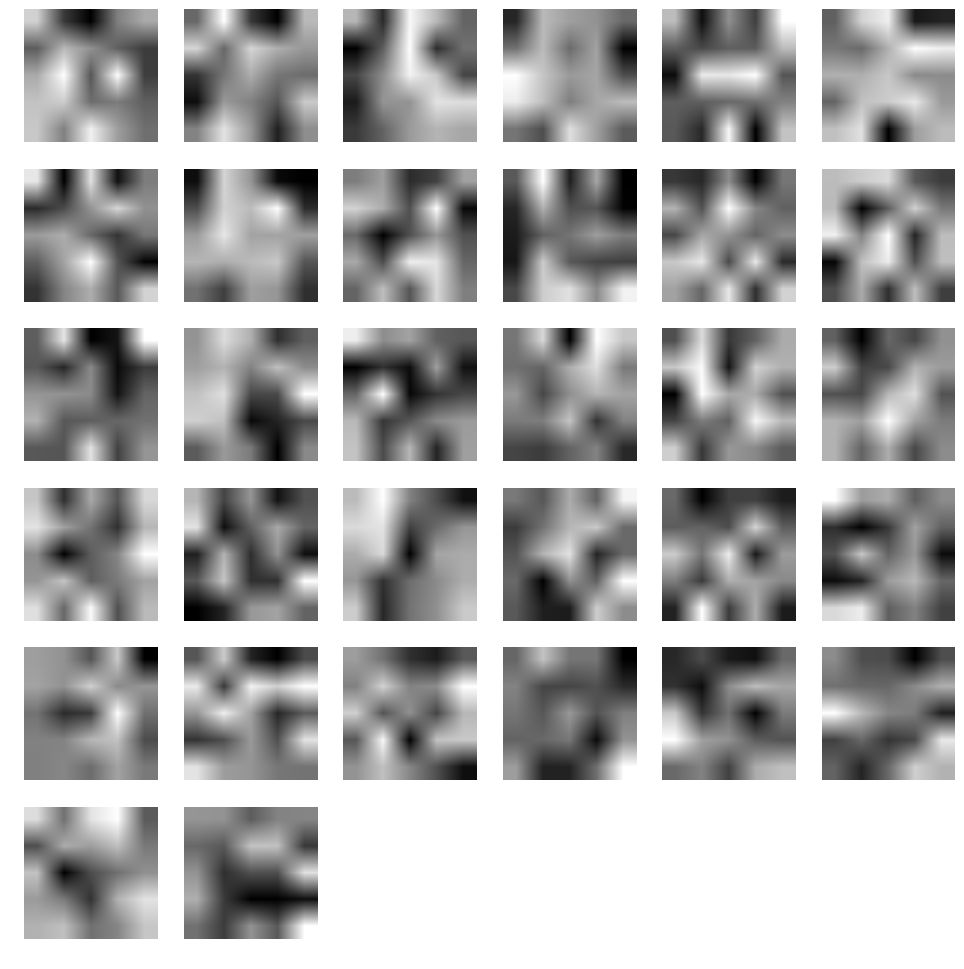

In [29]:
## First Layer Kernels
## Seemingly meaningless! 

W_conv1s = W_conv1.eval(session=sess) 
fig = plt.figure(figsize=(12,12))
print W_conv1s.shape
for i in range(W_conv1s.shape[3]):
    plt.subplot(6,6,i+1)
    plt.imshow(W_conv1s[:,:,0,i],cmap=plt.cm.gray);
    plt.axis('off')

(5, 5, 32, 64)


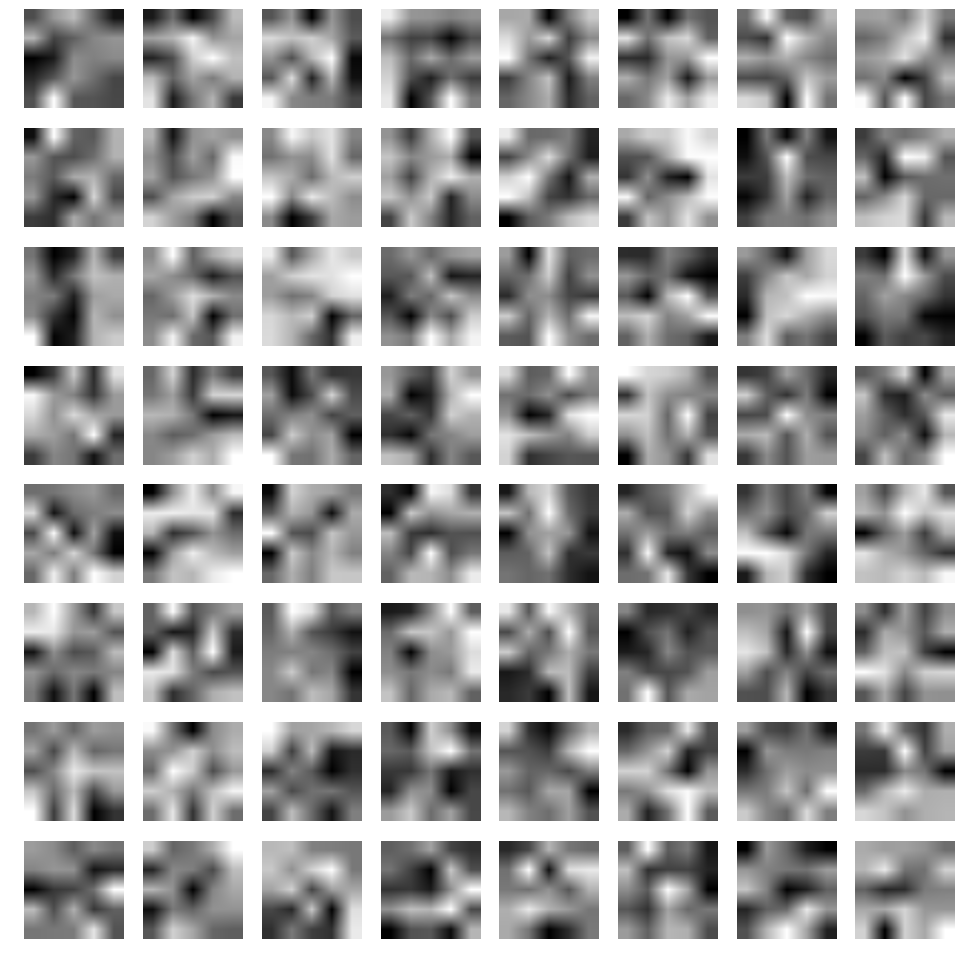

In [30]:
## Second Layer Kernels 
### here we have 32x64=2048 kernels by the size of 5x5
W_conv2s = W_conv2.eval(session=sess) 
fig = plt.figure(figsize=(12,12))
print W_conv2s.shape
for i in range(W_conv2s.shape[3]):
    plt.subplot(8,8,i+1)
    plt.imshow(W_conv2s[:,:,3,i],cmap=plt.cm.gray);
    plt.axis('off')

In [31]:
finalWs = W_fc3.eval(session=sess)

In [32]:
finalWs.shape

(256, 128)

In [33]:
hidden_layer = h_fc2.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0})
hidden_layer.shape

(10000, 256)

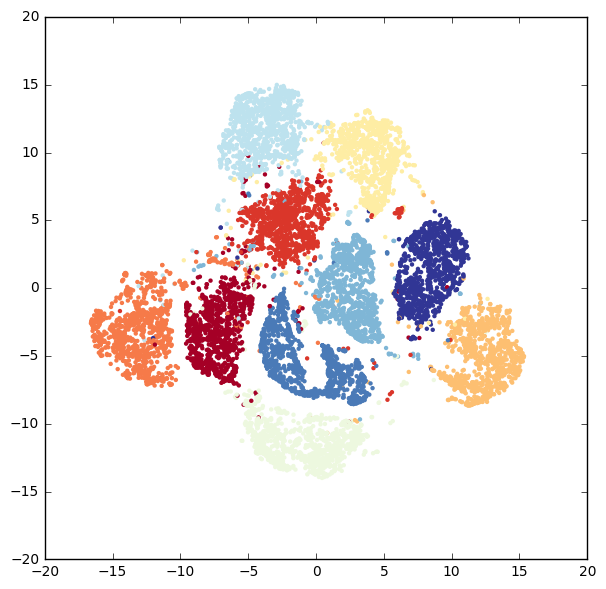

In [34]:
fig = plt.figure()
K = 9
plot_only = 10000
labels = testY[0:plot_only]
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(hidden_layer[0:plot_only,:])
plt.scatter(lowDWeights[:,0],lowDWeights[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)));
fig.set_size_inches(7,7);

In [35]:
hidden_layer_final = h_fc3.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0})
hidden_layer_final.shape

(10000, 128)

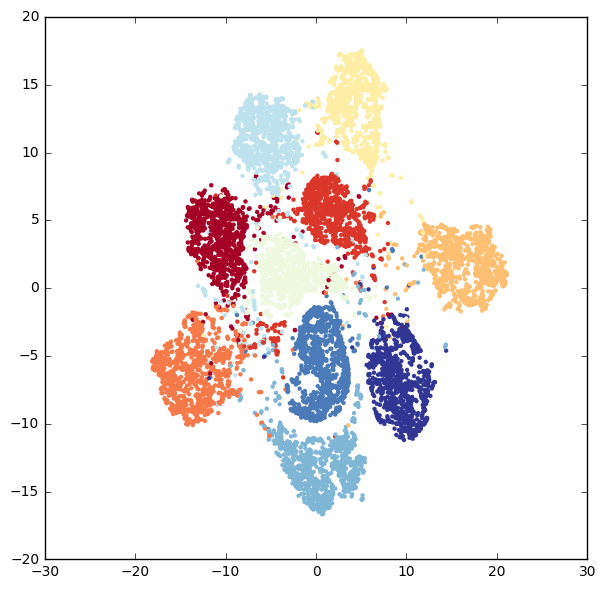

In [36]:
fig = plt.figure()
K = 9
plot_only = 10000
labels = testY[0:plot_only]
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(hidden_layer_final[0:plot_only,:])
plt.scatter(lowDWeights[:,0],lowDWeights[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)));
fig.set_size_inches(7,7);

In [37]:
hidden_layer_final = h_fc4.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0})
hidden_layer_final.shape

(10000, 10)

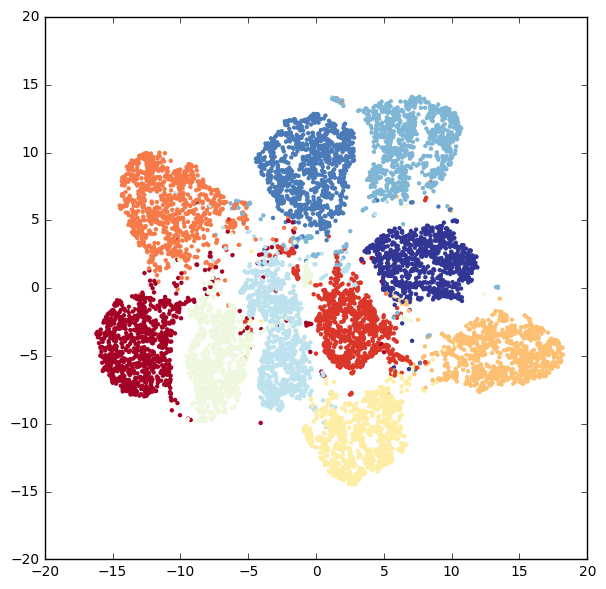

In [38]:
fig = plt.figure()
K = 9
plot_only = 10000
labels = testY[0:plot_only]
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(hidden_layer_final[0:plot_only,:])
plt.scatter(lowDWeights[:,0],lowDWeights[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)));
fig.set_size_inches(7,7);

In [39]:
hidden_layer_final_s = y_conv.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0})
hidden_layer_final_s.shape

(10000, 10)

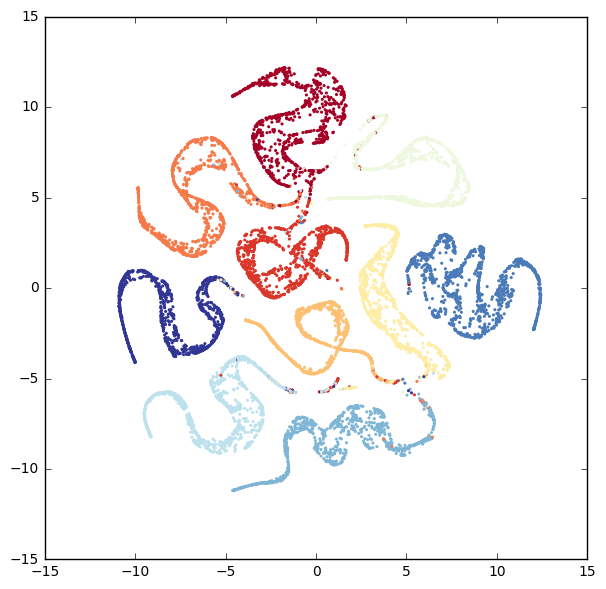

In [40]:
fig = plt.figure()
K = 9
plot_only = 10000
labels = testY[0:plot_only]
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(hidden_layer_final_s[0:plot_only,:])
plt.scatter(lowDWeights[:,0],lowDWeights[:,1],s=5,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)));
fig.set_size_inches(7,7);

## Applications to Urban Design
### Traditionally based on
* **Limited data**
* **very small region** 
* **few Normative theories and expert based or physics based**
* **What if we changes this game upsidedown?**
    * ** we have access to data of more than 1.2 Million cities, town, villages in a form of geometry or images**
    * ** Around 225M buildings in OSM**
    * ** Street view images from Google**
    * **Satellite images**
    * ** Many other observations such as air pollution, traffic, economies, business activities, ...**
## What if these Machine learning and Big Data can learn whatever relations we are looking for?
* **Health and place**
* **Economy and Space**
* **...**

[Some initial results on city forms of around 80K cities](https://github.com/sevamoo/roadsareread)

## Real time video segmentation for Self Driving Cars
Clement Farabet, Camille Couprie, Laurent Najman and Yann LeCun: Learning Hierarchical Features for Scene Labeling, IEEE Transactions on Pattern Analysis and Machine Intelligence, August, 2013

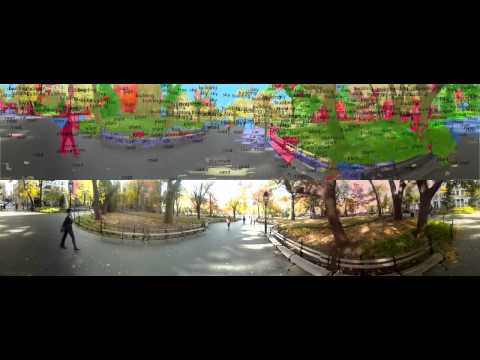

In [22]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZJMtDRbqH40',width=700, height=600)

### Other Architectures
### Generative Adverserial Networks (GAN) (very active area!)

#### Interpolations and generation from the learned latent space
[BEGAN: Boundary Equilibrium Generative Adversarial Networks](https://arxiv.org/pdf/1703.10717.pdf) 
![](Images/BEGAN.png)



## Joint Models
Learning visual similarity for product design with convolutional neural networks
https://www.cs.cornell.edu/~sbell/pdf/siggraph2015-bell-bala.pdf


## Siamese Networks
![](Images/Siamese.png)

# <a></a>
----

## A model is trained by two sources of inter-related data sets from desing websites
![](Images/Furniture_Siamese.png)

# <a></a>
----

## Now user can make visual queries and find similar things in each category of objects
![](Images/Furniture.png)

----
### Graphical CNN and heterogonous data domains with Non_euclidean Distance
* http://cims.nyu.edu/~bruna/Media/graph_cnn_ieee.pdf
![](Images/Graph_CNN.png)

